In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
test1 = pd.read_csv("../input/test.csv")
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
results = train ['y']
train = train.drop(['y','ID'], axis =1)
test = test1.drop(['ID'], axis =1)

In [4]:
train.isnull().sum()

X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
X31     0
X32     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 376, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['X0'] = LE.fit_transform(train['X0'])
train['X1'] = LE.fit_transform(train['X1'])
train['X2'] = LE.fit_transform(train['X2'])
train['X3'] = LE.fit_transform(train['X3'])
train['X4'] = LE.fit_transform(train['X4'])
train['X5'] = LE.fit_transform(train['X5'])
train['X6'] = LE.fit_transform(train['X6'])
train['X8'] = LE.fit_transform(train['X8'])

In [6]:
test['X0'] = LE.fit_transform(test['X0'])
test['X1'] = LE.fit_transform(test['X1'])
test['X2'] = LE.fit_transform(test['X2'])
test['X3'] = LE.fit_transform(test['X3'])
test['X4'] = LE.fit_transform(test['X4'])
test['X5'] = LE.fit_transform(test['X5'])
test['X6'] = LE.fit_transform(test['X6'])
test['X8'] = LE.fit_transform(test['X8'])

In [7]:
temp = []
for i in train.columns:
    if (train[i].var()<=0.15 and train[i].var()>=-0.15):
        temp.append(i)
print(len(temp))
print(temp)

296
['X4', 'X10', 'X11', 'X12', 'X13', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X28', 'X29', 'X30', 'X32', 'X33', 'X34', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X47', 'X48', 'X49', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59', 'X60', 'X61', 'X62', 'X63', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X82', 'X83', 'X84', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X97', 'X98', 'X99', 'X101', 'X102', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X117', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X128', 'X129', 'X130', 'X131', 'X133', 'X134', 'X135', 'X136', 'X138', 'X139', 'X140', 'X141', 'X143', 'X145', 'X146', 'X147', 'X148', 'X151', 'X152', 'X153', 'X155', 'X159', 'X160', 'X162', 'X164', 'X165', 'X166', 'X167', 'X169', 'X170', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X179', 'X180', 'X181',

In [8]:
train_cleaned = train.drop(temp, axis=1)
test_cleaned= test.drop(temp,axis=1)
train_cleaned.shape

(4209, 80)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


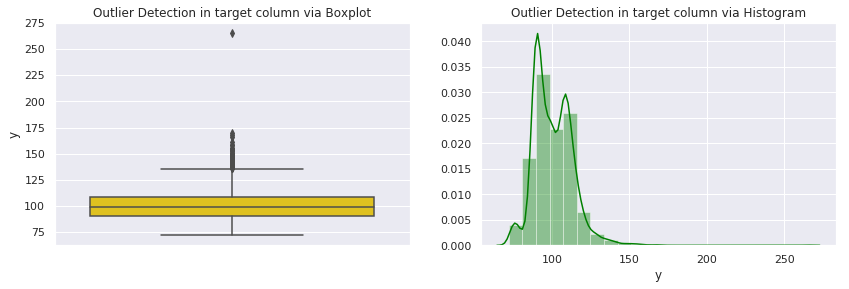

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,9)})
plt.subplot(221)
plt.title("Outlier Detection in target column via Boxplot")
plt.ylabel("Values of y")
plt.grid(True)
sns.boxplot(y=results,color='gold')
plt.subplot(222)
plt.title("Outlier Detection in target column via Histogram")
plt.grid(True)
ax = sns.distplot(results,color='green',bins=22)
plt.show()

In [10]:
temp_c=[]
for i in train_cleaned.columns:
    if i not in temp_c:
        for j in train_cleaned.columns:
            if(i==j):
                pass
            else:       
                if (train_cleaned[i].corr(train_cleaned[j])>=0.90 or train_cleaned[i].corr(train_cleaned[j])<=-0.90):
                    temp_c.append(j) 
temp_c             
    

['X251',
 'X35',
 'X37',
 'X137',
 'X324',
 'X150',
 'X363',
 'X119',
 'X311',
 'X158',
 'X157',
 'X250',
 'X251',
 'X187',
 'X194',
 'X362',
 'X247',
 'X358',
 'X314',
 'X337']

In [11]:
final_train = train_cleaned.drop(temp_c, axis =1)
final_test = test_cleaned.drop(temp_c, axis =1)
final_train.shape

(4209, 61)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_train,results,test_size = 0.05,random_state =0)


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [14]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.95, learning_rate = 0.05,
                max_depth = 4, alpha = 15, n_estimators = 500)

In [15]:
xg_reg.fit (x_train, y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=15, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.95, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [16]:
preds = xg_reg.predict(x_test)


In [17]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.016465


In [18]:
prediction = preds = xg_reg.predict(final_test)
prediction 

array([ 79.193146,  93.820076,  76.07631 , ...,  96.01529 , 110.690384,
        92.5049  ], dtype=float32)

In [19]:
sub = pd.DataFrame()
sub['ID'] = test1['ID']
sub['y'] = prediction
sub.to_csv('Submission.csv', index=False)